In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from minimal import * 

In [2]:
gm3 = eos(g_sigma_N = 8.784820, g_omega_N = 8.720086, g_rho_N = 8.544795, g_phi_N = 0.0, b = 0.008628, c = -0.002433,\
             g_sigma_H = 5.408849, g_omega_H = 5.813391, g_rho_H = 0.0, g_phi_H = -4.110688)

baryon_list = [Neutron, Proton, Lambda] 
meson_list = [sigma, omega, rho, phi] 
lepton_list = [electron]

init_system(gm3, meson_list, baryon_list)

In [3]:
data = pd.read_csv(r'/Users/vinhtran/Downloads/datafile_gm3.txt', sep=" ", header=0,\
                       names = ['nb/n0', 'P', 'E', 'Sigma', 'Rho','Omega', 'Phi', 'xn', 'xp',\
                            'xe', 'xL', 'fermi_n', 'fermi_p', 'fermi_e', 'fermi_L', 'nan'])
data

,nb/n0,P,E,Sigma,Rho,Omega,Phi,xn,xp,xe,xL,fermi_n,fermi_p,fermi_e,fermi_L,nan
0,0.28,0.070686,40.349774,8.198005,-2.328705,4.681230,-0.000000,0.990944,0.009056,0.009056,0.000000,212.949950,44.522679,44.522679,0.000000,NaN
1,0.29,0.080052,41.793525,8.453906,-2.409592,4.848417,-0.000000,0.990479,0.009521,0.009521,0.000000,215.421820,45.803502,45.803502,0.000000,NaN
2,0.30,0.090248,43.237612,8.707875,-2.490287,5.015604,-0.000000,0.990008,0.009992,0.009992,0.000000,217.835457,47.075844,47.075844,0.000000,NaN
3,0.31,0.101300,44.682054,8.959955,-2.570788,5.182791,-0.000000,0.989530,0.010470,0.010470,0.000000,220.194014,48.339953,48.339953,0.000000,NaN
4,0.32,0.113235,46.126866,9.210186,-2.651092,5.349977,-0.000000,0.989046,0.010954,0.010954,0.000000,222.500376,49.596057,49.596057,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,7.96,424.462572,1518.141189,76.157712,-19.387450,110.614440,-18.722709,0.390550,0.103000,0.103000,0.506450,476.509635,305.580406,305.580406,519.627154,NaN
769,7.97,425.578051,1520.582346,76.195184,-19.389709,110.732982,-18.763248,0.390156,0.102934,0.102934,0.506910,476.548918,305.642795,305.642795,520.001921,NaN
770,7.98,426.695085,1523.024904,76.232608,-19.391960,110.851508,-18.803800,0.389763,0.102868,0.102868,0.507369,476.588102,305.705038,305.705038,520.376269,NaN
771,7.99,427.813675,1525.468863,76.269983,-19.394204,110.970019,-18.844365,0.389371,0.102802,0.102802,0.507827,476.627187,305.767137,305.767137,520.750198,NaN


In [4]:
nb_array = data.loc[:,'nb/n0'].values
P_array = data.loc[:,'P'].values
E_array = data.loc[:,'E'].values
sigma_array = data.loc[:,'Sigma'].values
rho_array = data.loc[:,'Rho'].values
omega_array = data.loc[:,'Omega'].values
phi_array = data.loc[:,'Phi'].values

neutron_frac = data.loc[:, 'xn'].values
proton_frac = data.loc[:, 'xp'].values
electron_frac = data.loc[:, 'xe'].values
lambda_frac = data.loc[:, 'xL'].values

fermi_n = data.loc[:, 'fermi_n'].values
fermi_p = data.loc[:, 'fermi_p'].values
fermi_e = data.loc[:, 'fermi_e'].values
fermi_L = data.loc[:, 'fermi_L'].values

## Important Things

$$
    m_B^* = m_B - g_{\sigma B}\sigma\\
    E_{F_B}^* = \sqrt{k_{F_B}^2 + {m_B^*}^2}\\
    \text{log factor} = \ln \frac{k_{F_B} + E_{F_B}^*}{m_B^*}
$$

In [26]:
def mass_eff(baryon, sigma_field):
    return baryon.num_mass - baryon.num_g_sigma * sigma_field 

def baryon_EF(baryon, kf, sigma_field):
    m = mass_eff(baryon, sigma_field)
    return np.sqrt(kf**2 + m**2)

def log_fac(baryon, kf, sigma_field):
    numerator = kf + baryon_energy_density(baryon, kf, sigma_field) 
    denominator = mass_eff(baryon, sigma_field)
    return np.log(numerator/denominator)

## Sigma Partial Derivative
$$
    \frac{\partial \sigma}{\partial n_B} = 
    \frac{\sum_i g_{\sigma i}\beta_i}{m_\sigma^2 + \frac{\partial^2 U}{\partial \sigma^2} - \sum_i g_{\sigma_i} \alpha_i}
$$
with
$$
    \alpha_i = 
    - \frac{g_{\sigma i}}{2\pi^2} \left(k_{F_i} E_{F_i} - {m_i^*}^2 \ln \frac{k_{F_i} + E_{F_i}}{m_i^*}\right)
    + \frac{m_i^*}{2\pi^2} \left[k_{F_i}
    \left(-\frac{g_{\sigma i} m_i^*}{E_{F_i}}\right)
    +
    2m_i^* g_{\sigma i}\ln \frac{k_{F_i} + E_{F_i}}{m_i^*}
    - {m_i^*}^2  \left( \frac{g_{\sigma i}}{m_i^*}  - \frac{g_{\sigma i}m_i^*}{ E_{F_i}^*(k_{F_i} + E_{F_i}^*)}\right)
    \right]
$$
and
$$
    \beta_i = 
    \frac{m_i^*}{2\pi^2} 
    \left[
    \frac{\pi^2 x_i}{k_{F_i}}E_{F_i} 
    + k_{F_i}\frac{\pi^2 x_i}{k_{F_i}E_{F_i}}
    - {m_i^*}^2 \frac{\pi^2 x_i}{k_{F_i}^2 E_{F_i}}
    \right] 
$$
and
$$
    \frac{\partial^2U}{\partial \sigma^2} = 
    2 b m_N g_\sigma^3 \sigma + 3 c g_\sigma^4 \sigma^2 
$$

In [28]:
def second_deriv_U(sigma_field):
    term1 = 2 * sigma.num_b * Neutron.num_mass * Neutron.num_g_sigma**3 * sigma_field 
    term2 = 3 * sigma.num_c * Neutron.num_g_sigma **4 * sigma_field**2 
    return term1 + term2 

In [32]:
def alpha(baryon, kf, sigma_field, baryon_frac):
    m = mass_eff(baryon, sigma_field)
    xB = baryon_frac
    EF = baryon_EF(baryon, kf, sigma_field) 
    g_sigma = baryon.num_g_sigma 
    log_factor = log_fac(baryon, kf, sigma_field)
    pi = np.pi 
    
    term1_a = kf * EF 
    term1_a = - m**2 * log_factor 
    term1 = - g_sigma/(2*pi**2) * (term1_a + term1_a) 
    
    term2_a = - g_sigma * m * kf / EF 
    term2_b = 2 * m * g_sigma * log_factor 
    term2_c = - m**2 * (g_sigma/m - g_sigma * m/EF/(kf + EF))
    term2 = m/(2*pi**2)*(term2_a + term2_b + term2_c)
    
    return term1 + term2 

In [30]:
def beta(baryon, kf, sigma_field, baryon_frac):
    m = mass_eff(baryon, sigma_field)
    xB = baryon_frac
    EF = baryon_EF(baryon, kf, sigma_field) 
    g_sigma = baryon.num_g_sigma 
    log_factor = log_fac(baryon, kf, sigma_field)
    pi = np.pi
    
    term1 = pi**2 * xB * EF/kf
    term2 = kf * pi**2 * xB / kf / EF 
    term3 = - m**2 * pi**2 * xB/ kf**2 / EF
    
    return m/(2*pi**2) * (term1 + term2 + term3) 

In [10]:
def partial_sigma(Proton, Neutron, Lambda,\
                  Proton_kf, Neutron_kf, Lambda_kf,\
                  Proton_frac, Neutron_frac, Lambda_frac,\
                  sigma_field):
    
    if (Lambda_kf == 0.0):
        numerator = Proton.num_g_sigma * beta(Proton, Proton_kf, sigma_field, Proton_frac)\
                + Neutron.num_g_sigma * beta(Neutron, Neutron_kf, sigma_field, Neutron_frac)\
                
    elif (Lambda_kf != 0.0):
        numerator = Proton.num_g_sigma * beta(Proton, Proton_kf, sigma_field, Proton_frac)\
                + Neutron.num_g_sigma * beta(Neutron, Neutron_kf, sigma_field, Neutron_frac)\
                + Lambda.num_g_sigma * beta(Lambda, Lambda_kf, sigma_field, Lambda_frac)
    
    denominator = second_deriv_U(sigma_field) + sigma.num_mass**2
    
    if (Lambda_kf == 0.0):
        denominator = denominator -\
            Proton.num_g_sigma * alpha(Proton, Proton_kf, sigma_field, Proton_frac)\
                - Neutron.num_g_sigma * alpha(Neutron, Neutron_kf, sigma_field, Neutron_frac)
    
    elif (Lambda_kf != 0.0):
        denominator = denominator -\
                Proton.num_g_sigma * alpha(Proton, Proton_kf, sigma_field, Proton_frac)\
                - Neutron.num_g_sigma * alpha(Neutron, Neutron_kf, sigma_field, Neutron_frac)\
                - Lambda.num_g_sigma * alpha(Lambda, Lambda_kf, sigma_field, Lambda_frac)
    
    return numerator/denominator 

### Lepton Contribution
$$
    \frac{\partial P_\ell}{\partial n_B} 
     = 
      \frac{1}{12}\sum_\ell \frac{x_\ell}{ k_{F_\ell}^2 E_F} 
    \left[3E_{F_\ell}^2 k_{F_\ell}^2 + k_{F_\ell}^4 - \frac{3}{2}m^2(E_F^2 + k_{F_\ell}^2) + \frac{3}{2} m^4\right] 
$$

In [11]:
def lepton_energy_density(lepton, kf):
    return np.sqrt(lepton.num_mass**2 + kf**2)

In [12]:
def partial_P_lepton(lepton, kf, lepton_frac):
    # partial derivative of lepton pressure with respect to nb 
    
    EF = lepton_energy_density(lepton, kf)
    m = lepton.num_mass
    xl = lepton_frac 
    
    term1 = 3* EF**2 * kf**2 
    term2 = kf**4 
    term3 = -1.5 * m**2 * (EF**2 + kf**2) 
    term4 = 1.5 * m**4 
    
    return xl/12/kf**2/EF * (term1 + term2 + term3 + term4)

### Baryon Contribution

### Important Derivatives

In [13]:
def partial_kf(baryon_frac, kf):
    return np.pi**2 * baryon_frac / kf**2

def partial_eff_mass(baryon, partial_sigma):
    return - baryon.num_g_sigma * partial_sigma 

def partial_E_eff(baryon, baryon_frac, kf, sigma_field, partial_sigma):
    xB = baryon_frac
    EF = baryon_energy_density(baryon, kf, sigma_field)
    g_sigma = baryon.num_g_sigma 
    m = mass_eff(baryon, sigma_field)
    
    term1 = np.pi**2 * xB / kf / EF 
    term2 = - g_sigma * m / EF * partial_sigma 
    
    return term1 + term2 

def partial_log_factor(baryon, baryon_frac, kf, sigma_field, partial_sigma):
    xB = baryon_frac
    EF = baryon_energy_density(baryon, kf, sigma_field) 
    g_sigma = baryon.num_g_sigma 
    m = mass_eff(baryon, sigma_field) 
    pi = np.pi
    
    term1 = pi**2 * xB / kf**2 / EF 
    term2_a = g_sigma / m
    term2_b = - g_sigma * m / EF / (kf + EF)
    term2 = partial_sigma * (term2_a + term2_b)
    
    return term1 + term2

In [17]:
def partial_kf3_EF(baryon, baryon_frac, kf, sigma_field, partial_sigma):
    xB = baryon_frac
    EF = baryon_energy_density(baryon, kf, sigma_field)
    g_sigma = baryon.num_g_sigma 
    m = mass_eff(baryon, sigma_field)
    
    term1 = 3 * kf**2 * partial_kf(baryon_frac, kf) * EF
    term2 = kf**3 * partial_E_eff(baryon, baryon_frac, kf, sigma_field, partial_sigma)
    
    return term1 + term2 

In [16]:
def partial_m2_kf_EF(baryon, baryon_frac, kf, sigma_field, partial_sigma):
    xB = baryon_frac
    EF = baryon_energy_density(baryon, kf, sigma_field)
    g_sigma = baryon.num_g_sigma 
    m = mass_eff(baryon, sigma_field)
    
    term1 = 2 * m * partial_eff_mass(baryon, partial_sigma) * kf * EF
    term2 = m**2 * partial_kf(baryon_frac, kf) * EF
    term3 = m**2 * kf * partial_E_eff(baryon, baryon_frac, kf, sigma_field, partial_sigma)
    
    return term1 + term2 + term3

In [18]:
def partial_m4_log_factor(baryon, baryon_frac, kf, sigma_field, partial_sigma):
    xB = baryon_frac
    EF = baryon_energy_density(baryon, kf, sigma_field)
    g_sigma = baryon.num_g_sigma 
    m = mass_eff(baryon, sigma_field)
    log_factor = log_fac(baryon, kf, sigma_field) 
    
    term1 = 4 * m**3 * partial_eff_mass(baryon, partial_sigma) * log_factor
    term2 = m**4 * partial_log_factor(baryon, baryon_frac, kf, sigma_field, partial_sigma)
    
    return term1 + term2 

In [19]:
def baryon_pressure_contribution(baryon, baryon_frac, kf, sigma_field, partial_sigma):
    # contribution to pressure from a single baryon
    result = partial_kf3_EF(baryon, baryon_frac, kf, sigma_field, partial_sigma)\
            + partial_m2_kf_EF(baryon, baryon_frac, kf, sigma_field, partial_sigma)\
            + partial_m4_log_factor(baryon, baryon_frac, kf, sigma_field, partial_sigma)
    return result/12/np.pi**2

### Other Contributions

In [20]:
def partial_U(sigma_field, partial_sigma):
    term1 = sigma.num_b * Neutron.num_mass * Neutron.num_g_sigma**3 * sigma_field**2 
    term2 = sigma.num_c * Neutron.num_g_sigma**4 * sigma_field**3
    return (term1 + term2)*partial_sigma

In [21]:
def partial_P_sigma(sigma_field, partial_sigma):
    # returns the contribution to the pressure due to the presence of the 
    # sigma meson 
    return - sigma.num_mass**2 * sigma_field * partial_sigma

In [22]:
def partial_P_omega(omega_field, proton_frac, neutron_frac, lambda_frac):
    proton_term = Proton.num_g_omega * proton_frac 
    neutron_term = Neutron.num_g_omega * neutron_frac 
    lambda_term = Lambda.num_g_omega * lambda_frac 
    return omega_field * (proton_term + neutron_term + lambda_term)

In [23]:
def partial_P_rho(rho_field, proton_frac, neutron_frac):
    proton_term = Proton.num_g_rho * Proton.isospin * proton_frac 
    neutron_term = Neutron.num_g_rho * Neutron.isospin * neutron_frac 
    return rho_field * (proton_term + neutron_term)

In [24]:
def partial_P_phi(phi_field, proton_frac, neutron_frac, lambda_frac):
    proton_term = Proton.num_g_phi * proton_frac
    neutron_term = Neutron.num_g_phi * neutron_frac 
    lambda_term = Lambda.num_g_omega * lambda_frac
    return phi_field * (proton_term + neutron_term + lambda_term)

## Calculating the Adiabatic Sound Speed
1. Find $\partial \sigma/\partial n_B$ and store values for each $n_B$ in an array. Pass to the other things. 
2. Calculate Neutron chemical potential. Store values in an array. Pass to other things. 
3. Calculate partial derivative of the pressure. 

In [33]:
partial_sigma_array = np.zeros(len(nb_array))

for i in range(len(partial_sigma_array)):
    partial_sigma_array[i] = partial_sigma(Proton, Neutron, Lambda,\
                  fermi_p[i], fermi_n[i], fermi_L[i],\
                  proton_frac[i], neutron_frac[i], lambda_frac[i],\
                  sigma_array[i])

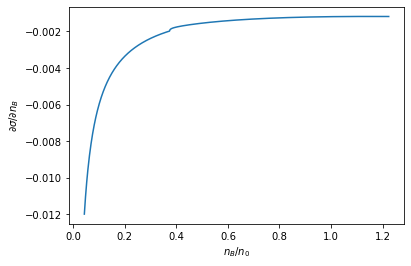

In [49]:
plt.plot(nb_array*0.153, partial_sigma_array)
plt.xlabel('$n_B/n_0$')
plt.ylabel('$\partial \sigma/\partial n_B$')
plt.show()

In [85]:
def partial_P_nB(sigma_field, omega_field, rho_field, phi_field, partial_sigma,\
                proton_frac, neutron_frac, lambda_frac, electron_frac,\
                proton_kf, neutron_kf, lambda_kf, electron_kf\
                ):
    result = 0.0 
    # sigma self interaction 
    result = -partial_U(sigma_field, partial_sigma) 
    
    # add meson contribution
    result += partial_P_sigma(sigma_field, partial_sigma)
    result += partial_P_omega(omega_field, proton_frac, neutron_frac, lambda_frac)
    result += partial_P_rho(rho_field, proton_frac, neutron_frac)
    result += partial_P_phi(phi_field, proton_frac, neutron_frac, lambda_frac)
    
    # add baryon contribution
    result += baryon_pressure_contribution(Proton, proton_frac, proton_kf, sigma_field, partial_sigma)
    result += baryon_pressure_contribution(Neutron, neutron_frac, neutron_kf, sigma_field, partial_sigma)
    if (lambda_kf != 0.0):
        result += baryon_pressure_contribution(Lambda, lambda_frac, lambda_kf, sigma_field, partial_sigma)
    
    # add lepton contribution
    result += partial_P_lepton(electron, electron_kf, electron_frac)
    
    return result 

In [86]:
partial_pressure_array = np.zeros(len(nb_array))

for i in range(len(partial_pressure_array)):
    partial_pressure_array[i] = partial_P_nB(sigma_array[i], omega_array[i], rho_array[i], phi_array[i], partial_sigma_array[i],\
                                             proton_frac[i], neutron_frac[i], lambda_frac[i], electron_frac[i],\
                                            fermi_p[i], fermi_n[i], fermi_L[i], fermi_e[i])

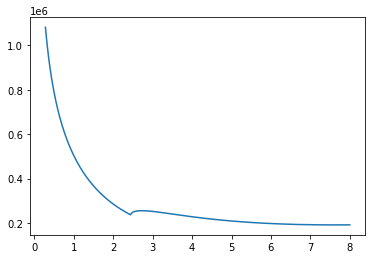

In [87]:
plt.plot(nb_array, partial_pressure_array)

In [88]:
def adiabatic(nb, energy_density, pressure, partial_pressure):
    return nb/(energy_density + pressure)*partial_pressure 

In [89]:
adiabatic_array = np.zeros(len(nb_array))
coeff_array = np.zeros(len(nb_array))

for i in range(len(adiabatic_array)):
    adiabatic_array[i] = adiabatic(nb_array[i]*0.153, E_array[i], P_array[i], partial_pressure_array[i])
    coeff_array[i] = nb_array[i]*0.153/(E_array[i] + P_array[i])

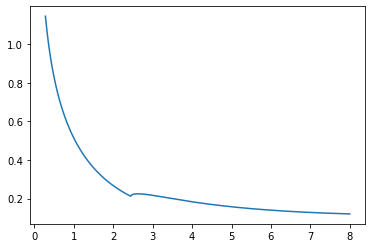

In [91]:
plt.plot(nb_array, adiabatic_array/1000)

### Troubleshooting 

In [ ]:
plt.plot()